# Régression logistique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('titanic_train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

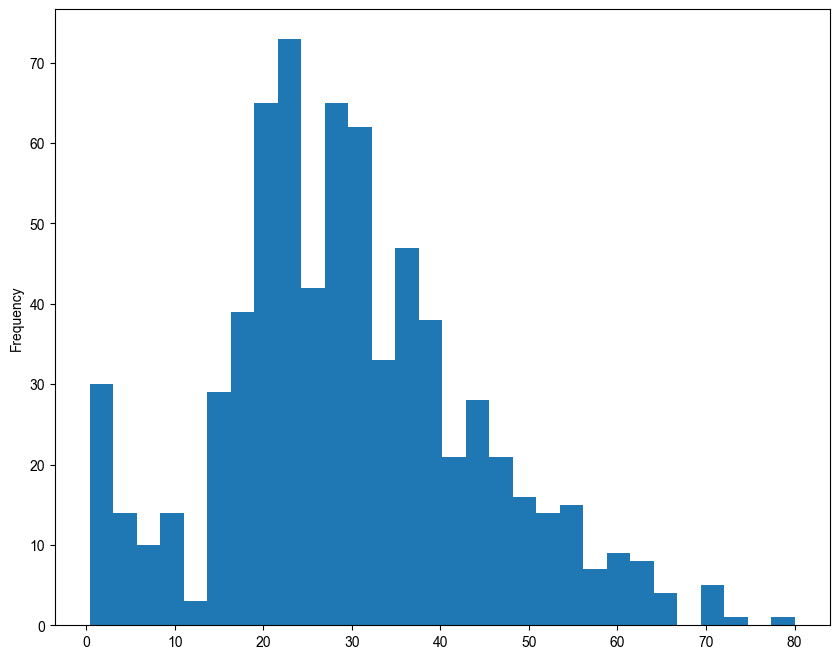

In [7]:
titanic['Age'].plot.hist(bins = 30, figsize = (10,8))
sns.set_style('darkgrid')

<Axes: ylabel='Frequency'>

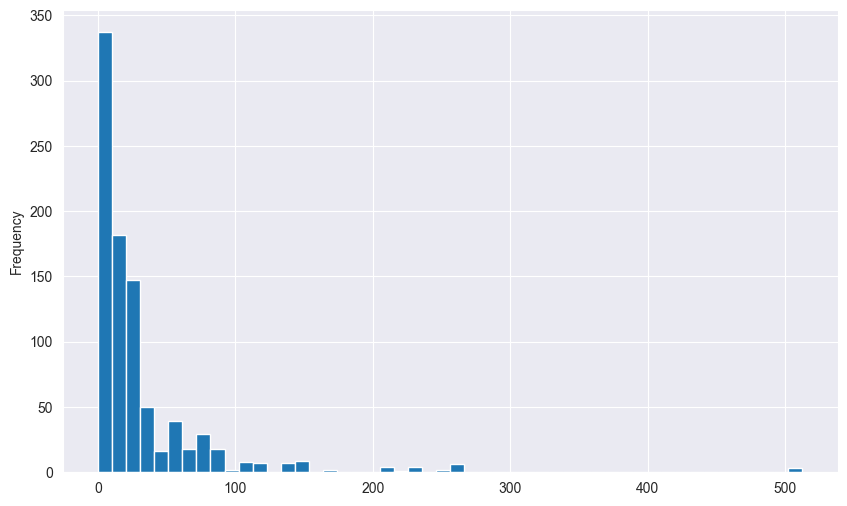

In [8]:
titanic['Fare'].plot.hist(bins = 50, figsize = (10,6))

<Axes: xlabel='Survived', ylabel='count'>

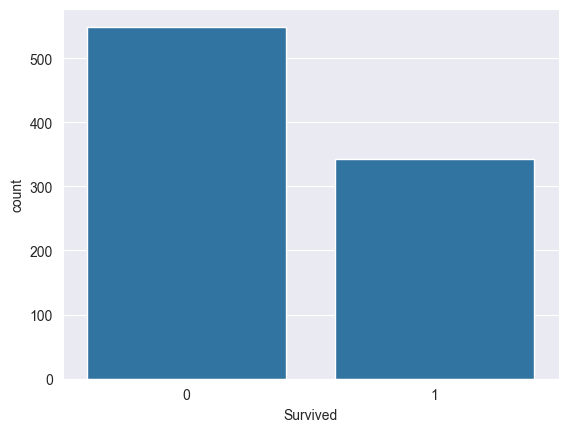

In [9]:
sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

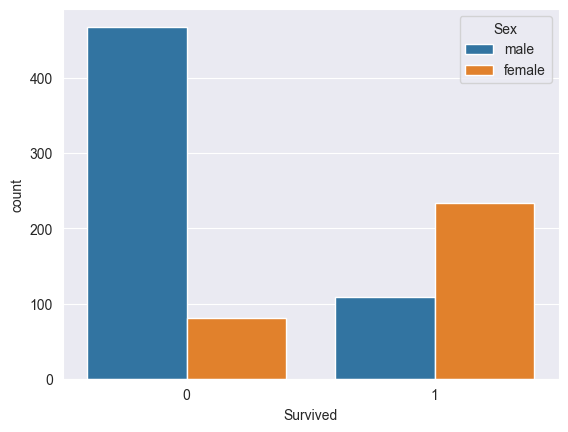

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

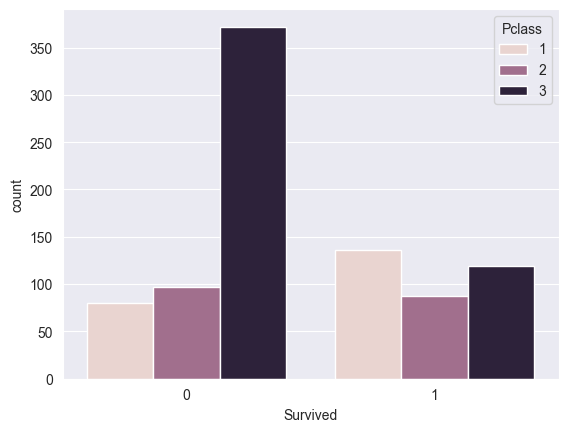

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

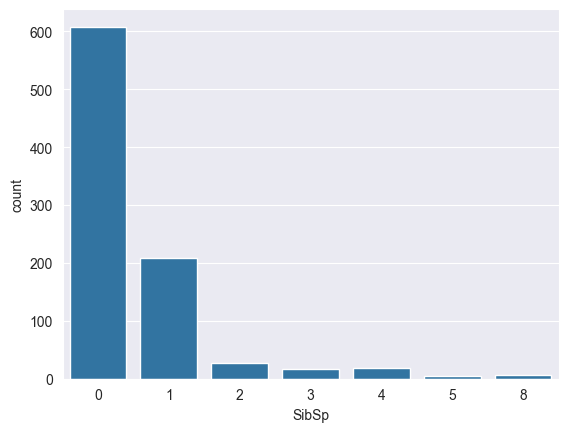

In [12]:
sns.countplot(x = 'SibSp', data = titanic)

<Axes: xlabel='Parch', ylabel='count'>

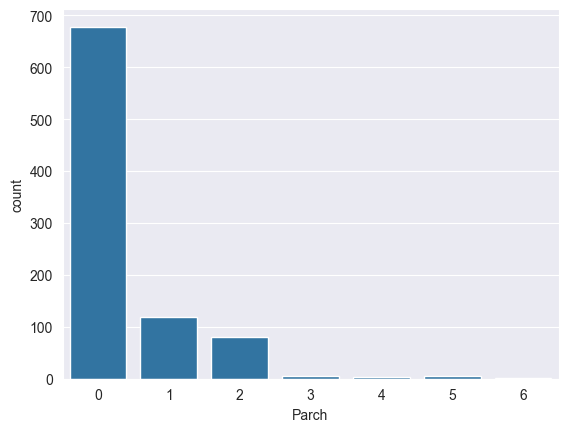

In [13]:
sns.countplot(x = 'Parch', data = titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

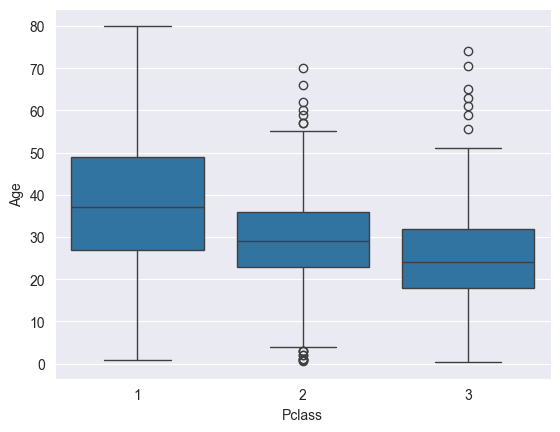

In [14]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [15]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
titanic.iloc[: , 3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
titanic[["Pclass", "Age", "Parch", "SibSp", "Fare"]].groupby('Pclass').mean()

,Age,Parch,SibSp,Fare
Pclass,,,,
1,38.233441,0.356481,0.416667,84.154687
2,29.877630,0.380435,0.402174,20.662183
3,25.140620,0.393075,0.615071,13.675550


In [18]:
def imputer_age(DF1):
    Age = DF1['Age']
    Pclass = DF1['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

* apply est utilisé pour appliquer une fonction à chaque série du DataFrame (colonne ou ligne), en spécifiant l'axe.
* applymap est utilisé pour appliquer une fonction à chaque élément du DataFrame, sans spécifier d'axe.

In [19]:
titanic['Age'] = titanic[['Age','Pclass']].apply(imputer_age, axis=1)

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
titanic.drop(['Cabin'], axis = 1, inplace = True)

In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
titanic.dropna(inplace = True)

In [24]:
titanic['Sex'].replace(['male','female'], [1,0], inplace = True)

In [25]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [26]:
titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

In [27]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [28]:
titanic.drop(['Name','Ticket','PassengerId'], axis =1, inplace = True)

In [29]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,25.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [30]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [32]:
y = titanic['Survived']

In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)
print('Données entrainment: ', X_train.shape)
print('données de test: ', X_test.shape)

Données entrainment:  (666, 7)
données de test:  (223, 7)


In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
predictions = model.predict(X_test)

In [38]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8138138138138138
Score sur la base des données de test: 0.7937219730941704


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       138
           1       0.74      0.71      0.72        85

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [40]:
confusion_matrix(y_test, predictions)

array([[117,  21],
       [ 25,  60]], dtype=int64)

### Amélioration du modèle avec une pipeline simple + GridSearchCV :


In [41]:
model = make_pipeline(RobustScaler(), LogisticRegression())
print(model)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression())])


In [42]:
grid_param = {  'logisticregression__penalty': ['l1', 'l2', 'elasticnet'] ,
                'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga'],
                'logisticregression__C': [0.01,1,5,10,15,20,30,40,50,100,1000]}
                

In [43]:
grid = GridSearchCV(model, grid_param, cv=7, verbose = 20)

In [44]:
grid.fit(X_train,y_train)

Fitting 7 folds for each of 165 candidates, totalling 1155 fits
[CV 1/7; 1/165] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 1/7; 1/165] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/7; 1/165] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 2/7; 1/165] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/7; 1/165] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 3/7; 1/165] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/7; 1/165] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 4/7; 1/165] END logisticregression__C=0.

[CV 2/7; 17/165] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.811 total time=   0.0s
[CV 3/7; 17/165] START logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 3/7; 17/165] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.821 total time=   0.0s
[CV 4/7; 17/165] START logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 4/7; 17/165] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.863 total time=   0.0s
[CV 5/7; 17/165] START logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 5/7; 17/165] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.768 total time=   0.0s
[CV 6/7; 17/165] START logisticregression__C=1, logisticr

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 1, 5, 10, 15, 20, 30,
                                                   40, 50, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'newton-cg',
                                                        'newton-cholesky',
                                                        'saga']},
             verbose=20)

In [45]:
grid.best_score_

0.812296365914787

In [46]:
grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [47]:
model = grid.best_estimator_

### Prédiction avec le model amélioré :

In [48]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8123123123123123
Score sur la base des données de test: 0.7937219730941704


### Prédiction avec le model amélioré :

In [49]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8123123123123123
Score sur la base des données de test: 0.7937219730941704


In [50]:
predictions_grid = model.predict(X_test)

In [51]:
model.classes_

array([0, 1], dtype=int64)

### Rapport de classification :

In [52]:
print(classification_report(y_test,predictions_grid))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       138
           1       0.74      0.71      0.72        85

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [53]:
conf_mtx = confusion_matrix(y_test, predictions_grid)
conf_mtx

array([[117,  21],
       [ 25,  60]], dtype=int64)

### <font color='lime'>Amélioration du modèle avec une Pipeline Avancé :</font>

<p id='ancre1'><span style='color:red;font-weight:bold;'>Début du programme</span></p>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline,make_union
from warnings import filterwarnings
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer,make_column_selector

##### On reprendra le Dataset dans son état brut car tout nos traitement seront intégrés dans une Pipeline de Preprocessing :

In [55]:
tita = pd.read_csv("titanic_train.csv")

In [56]:
tita.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


On enlève la colonne Ticket et Name ... car elles n'apporteront rien à notre étude :

In [57]:
tita.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
tita

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


Choix des variable explicatives et celle à expliquer :

In [58]:
X = tita.drop('Survived', axis=1)
y = tita.Survived
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


***

##### Avant de commencer le pré-processing, et pour traiter tout type de variable dans note Dataset X <i>(numérique ou catégorielle)</i>, Nous allons séparer le X en deux liste contenant les features de type numerique et les features catégorielles :

<a href='#ancre1'><span style='color:red;font-weight:bold;'> &#8657;Vers le début du programme</span></a>

In [59]:
# numerical_feat = ['Age', 'Pclass', 'Fare']
# categorial_feat = ['Sex', 'Embarked']

On peut utiliser le 'make_column_selector' pour ne pas avoir à exprimer explicitement le type de variable à séparer .

In [60]:
numerical_feat = make_column_selector(dtype_include=np.number)
categorial_feat = make_column_selector(dtype_exclude=np.number)

On va maintenant créer 2 Pipelines de préprocessing : 

In [61]:
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categ_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

on applique les pipelines sur les données à traiter:

In [62]:
PreProcessor = make_column_transformer((num_pipeline, numerical_feat),(categ_pipeline,categorial_feat))
PreProcessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE334290>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE335890>)])

Notre Preprocessor est désormais prêt à être implémenter dans notre modèle de ML :

In [63]:
model = make_pipeline(PreProcessor, LogisticRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE334290>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE335890>)])),
                ('logisticregression', LogisticRegression())])

#### Split des données pour l'entrainement et le testing :

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape

(668, 5)

<a href='#ancre1'><span style='color:red;font-weight:bold;'> &#8657;Vers le début du programme</span></a>

##### Entrainement du modèle avec une GridSearchCV :

In [65]:
model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE334290>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                      

In [66]:
grid_param = {  'logisticregression__penalty': ['l1', 'l2', 'elasticnet'] ,
                'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga'],
                'logisticregression__C': [0.01,1,5,10,15,20,30,40,50,100]}

In [67]:
grid = GridSearchCV(model, grid_param, cv=7, verbose=20)

In [68]:
grid.fit(X_train,y_train)

Fitting 7 folds for each of 150 candidates, totalling 1050 fits
[CV 1/7; 1/150] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 1/7; 1/150] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/7; 1/150] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 2/7; 1/150] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/7; 1/150] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 3/7; 1/150] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/7; 1/150] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 4/7; 1/150] END logisticregression__C=0.

[CV 2/7; 9/150] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky;, score=0.750 total time=   0.0s
[CV 3/7; 9/150] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky
[CV 3/7; 9/150] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky;, score=0.750 total time=   0.0s
[CV 4/7; 9/150] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky
[CV 4/7; 9/150] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky;, score=0.789 total time=   0.0s
[CV 5/7; 9/150] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky
[CV 5/7; 9/150] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cholesky;, score=0.737 total time=   0.0s
[

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE334290>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(stra...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE335890>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 1, 5, 10, 15, 20, 30,
                                                   40, 50, 100],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'newton-cg',
                                                        'newton-cholesky',
                                                        'saga']},
             verbose=20)

In [69]:
grid.best_params_

{'logisticregression__C': 5,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [70]:
grid.best_score_

0.8040256892230576

In [71]:
model = grid.best_estimator_
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186ED0756D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000186EE2DA250>)])),
                ('logisticregression',
                 LogisticRegression(C=5, penalty='l1', solver='saga'))])

### Prédiction avec le model amélioré :


In [72]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8038922155688623
Score sur la base des données de test: 0.7892376681614349


In [73]:
predictions_grid = model.predict(X_test)

In [74]:
### Rapport de classification :
print(classification_report(y_test,predictions_grid))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       128
           1       0.79      0.68      0.73        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [75]:
#matrice de confusion : 
conf_mtx = confusion_matrix(y_test, predictions_grid)
conf_mtx

array([[111,  17],
       [ 30,  65]], dtype=int64)